In [ ]:
import torch, numpy as np, matplotlib.pyplot as plt

def run_sgd(func="min", momentum=0.0, weight_decay=0.0, maximize=False,
            lr=0.1, steps=60, start=(2.5, -2.0), tol=None, seed=0):
    torch.manual_seed(seed)
    w = torch.nn.Parameter(torch.tensor(start, dtype=torch.float32))
    opt = torch.optim.SGD([w], lr=lr, momentum=momentum,
                          weight_decay=weight_decay, maximize=maximize)
    path = [w.detach().numpy().copy()]
    for _ in range(steps):
        opt.zero_grad()
        loss = (w**2).sum() if func=="min" else -(w**2).sum()
        loss.backward(); opt.step()
        path.append(w.detach().numpy().copy())
        if tol is not None and w.detach().norm().item() < tol: 
            break
    return np.vstack(path)

def contour(ax, func="min"):
    xs = ys = np.linspace(-3, 3, 201)
    X, Y = np.meshgrid(xs, ys)
    Z = (X**2 + Y**2) if func=="min" else -(X**2 + Y**2)
    cs = ax.contour(X, Y, Z, levels=15, linewidths=0.8)
    ax.clabel(cs, inline=True, fontsize=8)
    ax.set_xlim(-3,3); ax.set_ylim(-3,3); ax.set_aspect("equal")

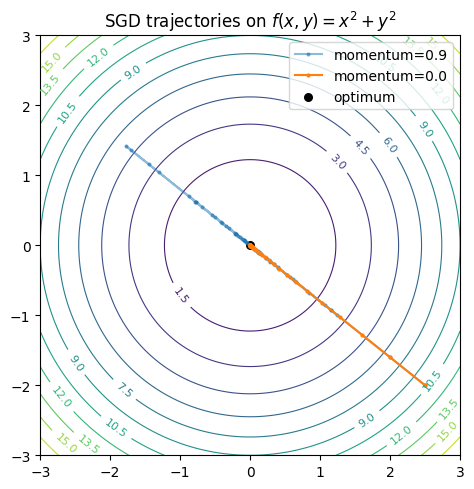

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
contour(ax, func="min")
p_m09 = run_sgd(func="min", momentum=0.9, tol=1e-3)   
p_m00 = run_sgd(func="min", momentum=0.0, tol=1e-3)
ax.plot(p_m09[:,0], p_m09[:,1], "-o", ms=2, alpha=0.5, label="momentum=0.9")
ax.plot(p_m00[:,0], p_m00[:,1], "-o", ms=2, label="momentum=0.0")
ax.scatter([0],[0], c="k", s=30, label="optimum")
ax.set_title("SGD trajectories on $f(x,y)=x^2+y^2$")
ax.legend(); plt.tight_layout()


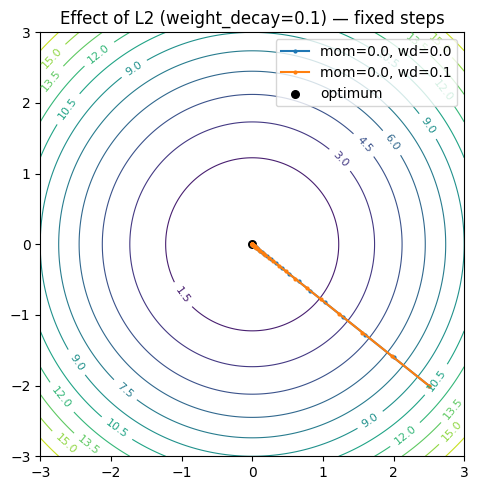

In [31]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
contour(ax, func="min")
steps = 40
p_wd0  = run_sgd(func="min", momentum=0.0, weight_decay=0.0, steps=steps, tol=None)
p_wd01 = run_sgd(func="min", momentum=0.0, weight_decay=0.1, steps=steps, tol=None)
ax.plot(p_wd0[:,0],  p_wd0[:,1],  "-o", ms=2, label="mom=0.0, wd=0.0")
ax.plot(p_wd01[:,0], p_wd01[:,1], "-o", ms=2, label="mom=0.0, wd=0.1")
ax.scatter([0],[0], c="k", s=30, label="optimum")
ax.set_title("Effect of L2 (weight_decay=0.1) — fixed steps")
ax.legend(); plt.tight_layout()


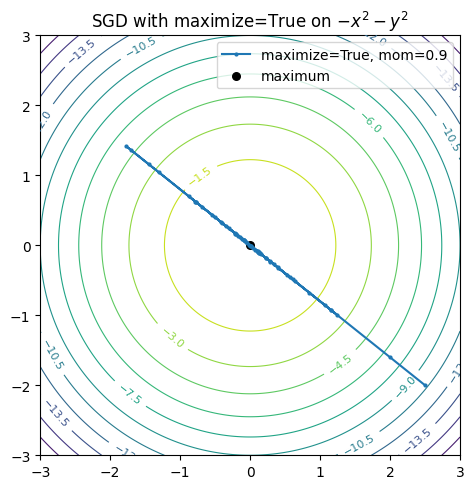

In [32]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
contour(ax, func="max")  # contours of -x^2 - y^2
p_max = run_sgd(func="max", momentum=0.9, maximize=True, tol=1e-3)
ax.plot(p_max[:,0], p_max[:,1], "-o", ms=2, label="maximize=True, mom=0.9")
ax.scatter([0],[0], c="k", s=30, label="maximum")
ax.set_title("SGD with maximize=True on $-x^2-y^2$")
ax.legend(); plt.tight_layout()
